In [1]:
"""
Compsci 571 Homework 2
Question 1 Basketball Court Classification
Yilin Gao (yg95)
Python 3.6
"""

'\nCompsci 571 Homework 2\nQuestion 1 Basketball Court Classification\nYilin Gao (yg95)\nPython 3.6\n'

In [5]:
"""Import libraries"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
from os import system

In [6]:
'''
the perceptron algorithm

parameter S: numpy array for the dataset (training/testing)
    S.shape = (n, p+1)
    each row is sample {xi, yi}, with p features and 1 label
parameter I: max number of epochs, default to 100
return epoch_w: w vector for each epoch number from 0 to 99
    epoch_w.shape = (100, p)
'''
def perceptron(S, I = 100):
    n = S.shape[0]
    p = S.shape[1] - 1
    epoch_w = np.empty([0, p])
    w = np.zeros([1, p])
    ite = 0 # iteration defined as number of updates
    for e in range(0, I):
        mis = False # if in this epoch there is no more misclassified points
        for i in range(0, n):
            if S[i, -1].reshape(1, 1) * np.dot(w, S[i, 0:p]) <= 0:
                mis = True
                w = w + S[i, -1].reshape(1, 1) * S[i, 0:p]
                ite += 1
        epoch_w = np.append(epoch_w, w, axis = 0)
        if (mis == False): # after this epoch all points are correctly classified, end and return current w
            print('Perceptron algorithm ends at epoch ' + str(e) + '.')
            print('Perceptron algorithm ends after ' + str(ite) + ' iterations.')
            return epoch_w
    print('Perceptron maximum epoch is reached.')
    return epoch_w

In [18]:
S = np.array([[0.75, 0.10, -1], [0.85, 0.8, -1], [0.85, 0.95, 1], [0.15, 0.1, -1], [0.05, 0.25, 1], [0.05, 0.5, 1], [0.85, 0.25, -1]])
n = S.shape[0]
print(S)

[[ 0.75  0.1  -1.  ]
 [ 0.85  0.8  -1.  ]
 [ 0.85  0.95  1.  ]
 [ 0.15  0.1  -1.  ]
 [ 0.05  0.25  1.  ]
 [ 0.05  0.5   1.  ]
 [ 0.85  0.25 -1.  ]]


In [19]:
"""
q1a
run Perceptron to compute a linear classifier going though the origin on the dataset
w initialized at [0, 0]
scan the observed points in the given order
"""
w_perc = perceptron(S)
print(w_perc)

Perceptron algorithm ends at epoch 2.
Perceptron algorithm ends after 7 iterations.
[[-0.9   0.5 ]
 [-1.05  1.1 ]
 [-1.05  1.1 ]]


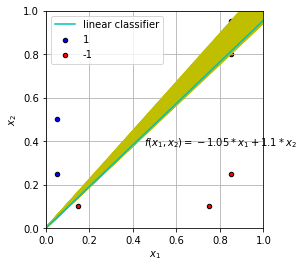

In [20]:
"""
q1a
plot observed data points, the perceptron boundary after convergence, and all other boundaries with same error rate
"""
# training points
n_classes = 2
colors = 'br'
for yvalue, color in zip([1, -1], colors):
    idx = np.where(S[:, -1] == yvalue)
    plt.scatter(S[idx, 0], S[idx, 1], c = color, label = yvalue, edgecolor = 'black', s = 20)

# other decision boundaries with same error
x_other = 1.1
y_other = np.arange(1.035, 1.229, 0.002)
for yi in np.nditer(y_other):
    plt.plot([0, x_other], [0, yi], 'y')

# calculated decision boundary from perceptron
x_perc = w_perc[-1, 1]
y_perc = -1 * w_perc[-1, 0]
plt.plot([0, x_perc], [0, y_perc], 'c', label = 'linear classifier')
plt.text(0.45, 0.38, r'$f(x_1, x_2) = -1.05 * x_1 + 1.1 * x_2$' )

plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [21]:
"""
q1b
grow a fully-grown decision tree using Gini Index as the splitting criteria
"""
X = S[:, 0: -1]
y = S[:, -1]
# criteria is gini by default
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X, y)
yhat_tree = dt.predict(X)
error_tree = sum(yhat_tree != y) / n
print('Error rate of decision tree is', error_tree)

Error rate of decision tree is 0.0


In [8]:
# generate png file of the decision tree
dotfile = open('tree.dot', 'w')
tree.export_graphviz(dt, out_file = dotfile)
dotfile.close()
system('dot -Tpng tree.dot -o ../hw2_answer/images/q1b_tree.png')
system('rm tree.dot')

0

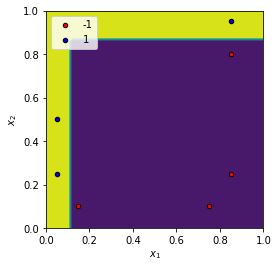

In [22]:
"""
q1b
plot observed data points and decision tree boundary after convergence

reference: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
"""
# Parameters
n_classes = 2
plot_colors = 'rb'
plot_step = 0.02

# Plot the decision boundary
x_bd_min, x_bd_max = 0, 1.02
y_bd_min, y_bd_max = 0, 1.02
xx_bd, yy_bd = np.meshgrid(np.arange(x_bd_min, x_bd_max, plot_step),
                    np.arange(y_bd_min, y_bd_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z_bd = dt.predict(np.c_[xx_bd.ravel(), yy_bd.ravel()])
Z_bd = Z_bd.reshape(xx_bd.shape)
cs = plt.contourf(xx_bd, yy_bd, Z_bd)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Plot the training points
for i, color in zip([-1, 1], plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

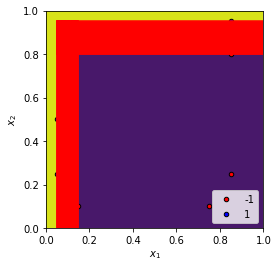

In [12]:
"""
q1b
plot observed data points, decision tree boundary after convergence, and all other decision boundaries with same error rate
"""
# Parameters
n_classes = 2
plot_colors = 'rb'
plot_step = 0.02

# Plot the decision boundary
x_bd_min, x_bd_max = 0, 1.02
y_bd_min, y_bd_max = 0, 1.02
xx_bd, yy_bd = np.meshgrid(np.arange(x_bd_min, x_bd_max, plot_step),
                    np.arange(y_bd_min, y_bd_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z_bd = dt.predict(np.c_[xx_bd.ravel(), yy_bd.ravel()])
Z_bd = Z_bd.reshape(xx_bd.shape)
cs = plt.contourf(xx_bd, yy_bd, Z_bd)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Plot the training points
for i, color in zip([-1, 1], plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

# other decision boundaries
x_other = np.arange(0.05, 0.15, 0.002)
y_other = 0.95
for xi in np.nditer(x_other):
    plt.plot([xi, xi], [0, y_other], 'r')
x_other = 0.05
y_other = np.arange(0.8, 0.952, 0.002)
for yi in np.nditer(y_other):
    plt.plot([x_other, 1], [yi, yi], 'r')

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [13]:
"""
q1c
the function between the real risk (t) and boundary slope (p)
"""
def t(pi):
    return 1/6 * pi ** (-3) - (1/2 - np.pi/8) * 1 / pi + 1 - np.pi/4

In [14]:
p_star = (1 - (np.pi / 4)) ** (-1/2)
t_star = t(p_star)
print(p_star, t_star)

2.158655221735395 0.18146363796206844


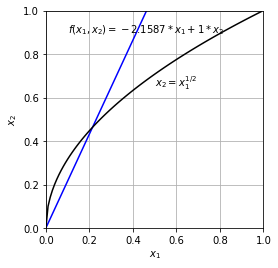

In [15]:
"""
q1c
plot of the true linear boundary on the basketball court
"""
# true optimized linear boundary
plt.plot([0, 1 / p_star], [0, 1], 'b', )
plt.text(0.1, 0.9, r'$f(x_1, x_2) = -2.1587 * x_1 + 1 * x_2$' )

# true curve
x_true = np.arange(0, 1, 0.01, dtype = float)
y_true = x_true ** 0.5

plt.plot(x_true, y_true, 'black')
plt.text(0.5, 0.65, r'$x_2 = x_1^{1/2}$' )

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [16]:
"""
q1d
local optimized R_real (t) when 0 <= n <= m^0.5
"""
t_1 = np.pi / 4 - 2/3 * (1/3) ** 0.5
print(t_1)

0.4004979839376978


In [17]:
"""
q1d
local optimized m, n, and R_real (t) when m^0.5 <= n <= 1
"""
m_2 = (4 - np.pi) ** 2 / (4 ** 2 + 4 * (4 - np.pi) + np.pi ** 2)
n_2 = ((1 - np.pi / 4) * m_2 + np.pi / 4) ** 0.5
t_2 = 1/3 * n_2 ** 3 + (np.pi / 4 - 1) * n_2 * m_2 - np.pi * n_2 / 4 + 2/3 * m_2 ** 1.5 + np.pi / 6
t_2_other = -2/3 * ((1 - np.pi/4) * m_2 + np.pi / 4) ** 1.5 + 2/3 * m_2 ** 1.5 + np.pi / 6
assert t_2 == t_2_other
print(m_2, n_2, t_2)

0.025146138400079843 0.8892663104388737 0.0574391669843608


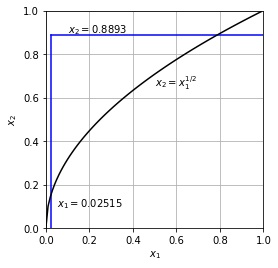

In [18]:
"""
q1d
plot of the true decision tree boundary on the basketball court
"""
# true optimized decision tree boundary
plt.plot([m_2, m_2], [0, n_2], 'b', )
plt.plot([m_2, 1], [n_2, n_2], 'b', )
plt.text(0.05, 0.1, r'$x_1 = 0.02515$' )
plt.text(0.1, 0.9, r'$x_2 = 0.8893$' )

# true curve
x_true = np.arange(0, 1, 0.01, dtype = float)
y_true = x_true ** 0.5

plt.plot(x_true, y_true, 'black')
plt.text(0.5, 0.65, r'$x_2 = x_1^{1/2}$' )

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()